In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_pickle('/Users/ananyaparikh/Documents/Coding/DeepRGARCH/code submission/data/rv.pkl')

print("Type:", type(data))
print(data.head())

Type: <class 'pandas.core.frame.DataFrame'>
                                        bv     medrv  open_price  rk_parzen  \
Symbol                                                                        
.AEX   2000-01-03 00:00:00+00:00  0.000100  0.000050      675.67   0.000179   
       2000-01-04 00:00:00+00:00  0.000207  0.000075      664.20   0.000423   
       2000-01-05 00:00:00+00:00  0.000361  0.000166      633.37   0.000324   
       2000-01-06 00:00:00+00:00  0.000258  0.000152      632.46   0.000219   
       2000-01-07 00:00:00+00:00  0.000130  0.000039      628.93   0.000155   

                                  rk_twoscale      rv10     bv_ss       rsv  \
Symbol                                                                        
.AEX   2000-01-03 00:00:00+00:00     0.000103  0.000178  0.000100  0.000046   
       2000-01-04 00:00:00+00:00     0.000199  0.000261  0.000207  0.000147   
       2000-01-05 00:00:00+00:00     0.000325  0.000714  0.000361  0.000328   
       

In [5]:
# Load full dataset
df_full = pd.read_pickle('/Users/ananyaparikh/Documents/Coding/DeepRGARCH/code submission/data/rv.pkl')

# Extract AEX only
df = df_full.loc['.AEX'].copy()

# Keep only selected columns
df_clean = df[['rv5', 'open_to_close', 'open_price']].reset_index()

# Optional: Rename for clarity
df_clean.rename(columns={'open_to_close': 'log_return', 'index': 'date'}, inplace=True)

# Preview
print(df_clean.head())


                        date       rv5  log_return  open_price
0  2000-01-03 00:00:00+00:00  0.000130   -0.000340      675.67
1  2000-01-04 00:00:00+00:00  0.000201   -0.033606      664.20
2  2000-01-05 00:00:00+00:00  0.000491   -0.001675      633.37
3  2000-01-06 00:00:00+00:00  0.000225   -0.013130      632.46
4  2000-01-07 00:00:00+00:00  0.000138    0.025013      628.93


In [4]:
print(df_clean.info())
print(df_clean.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5706 entries, 0 to 5705
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        5706 non-null   object 
 1   rv5         5706 non-null   float64
 2   log_return  5706 non-null   float64
 3   open_price  5706 non-null   float64
dtypes: float64(3), object(1)
memory usage: 178.4+ KB
None
               rv5   log_return   open_price
count  5706.000000  5706.000000  5706.000000
mean      0.000116    -0.000302   454.119267
std       0.000216     0.010884   128.297243
min       0.000002    -0.084156   199.340000
25%       0.000030    -0.004919   343.277500
50%       0.000056     0.000177   443.035000
75%       0.000117     0.004860   539.462500
max       0.004200     0.092366   827.570000


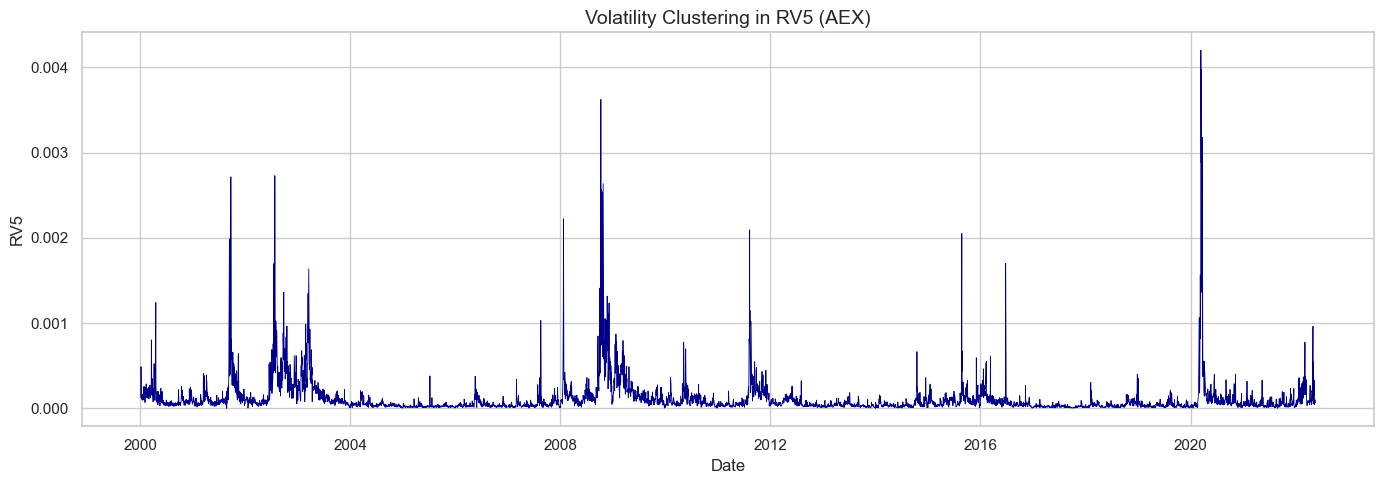

In [6]:
plt.figure(figsize=(14, 5))
plt.plot(df_clean['date'], df_clean['rv5'], color='darkblue', linewidth=0.6)
plt.title('Volatility Clustering in RV5 (AEX)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('RV5')
plt.grid(True)
plt.tight_layout()
plt.show()

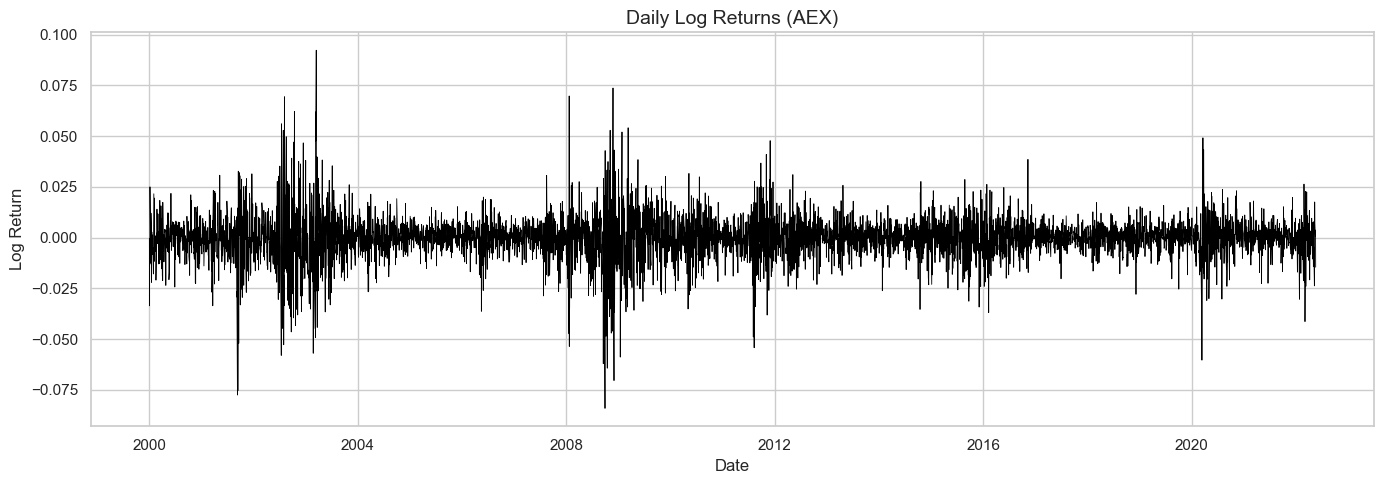

In [7]:
plt.figure(figsize=(14, 5))
plt.plot(df_clean['date'], df_clean['log_return'], color='black', linewidth=0.6)
plt.title('Daily Log Returns (AEX)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.tight_layout()
plt.show()

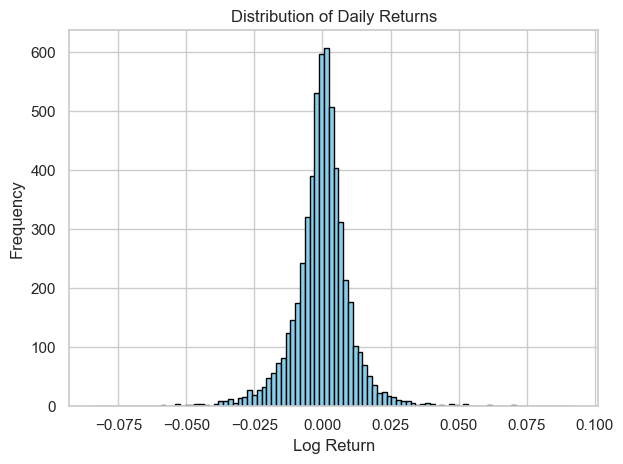

In [8]:
plt.hist(df_clean['log_return'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

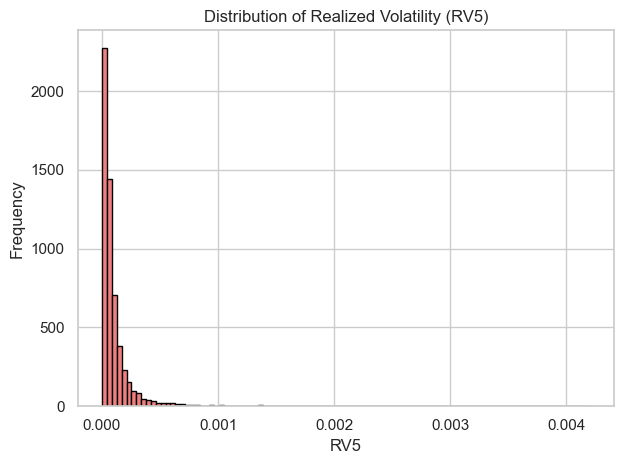

In [9]:
plt.hist(df_clean['rv5'], bins=100, color='lightcoral', edgecolor='black')
plt.title('Distribution of Realized Volatility (RV5)')
plt.xlabel('RV5')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

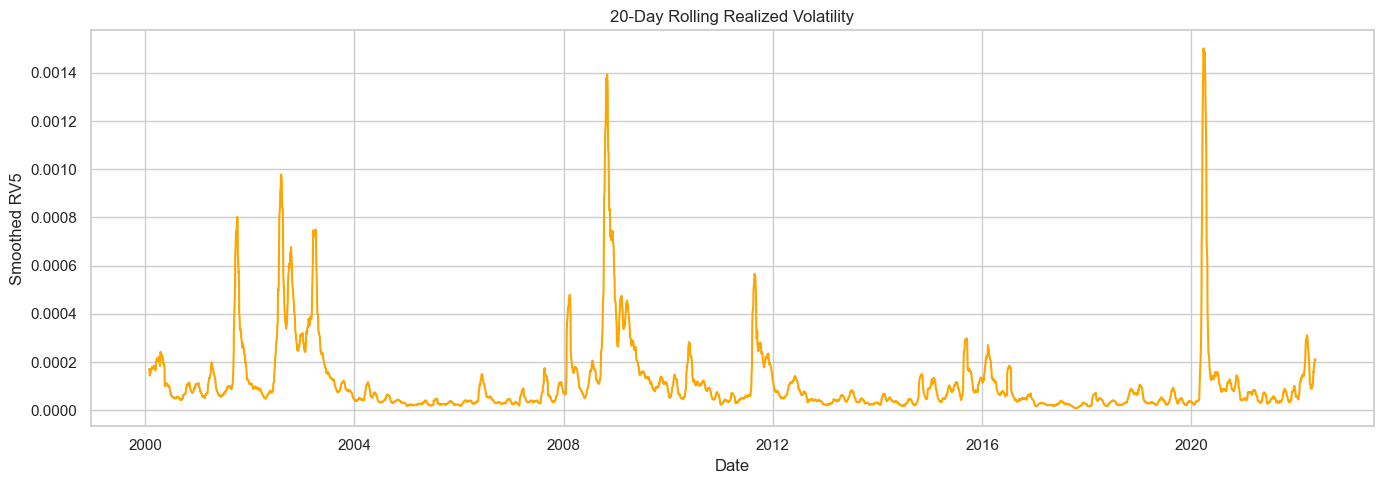

In [10]:
rolling_vol = df_clean['rv5'].rolling(window=20).mean()

plt.figure(figsize=(14, 5))
plt.plot(df_clean['date'], rolling_vol, color='orange')
plt.title('20-Day Rolling Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Smoothed RV5')
plt.grid(True)
plt.tight_layout()
plt.show()


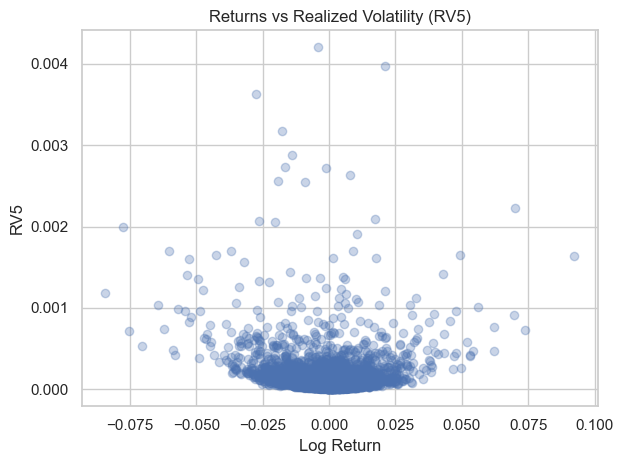

In [11]:
plt.scatter(df_clean['log_return'], df_clean['rv5'], alpha=0.3)
plt.title('Returns vs Realized Volatility (RV5)')
plt.xlabel('Log Return')
plt.ylabel('RV5')
plt.grid(True)
plt.tight_layout()
plt.show()

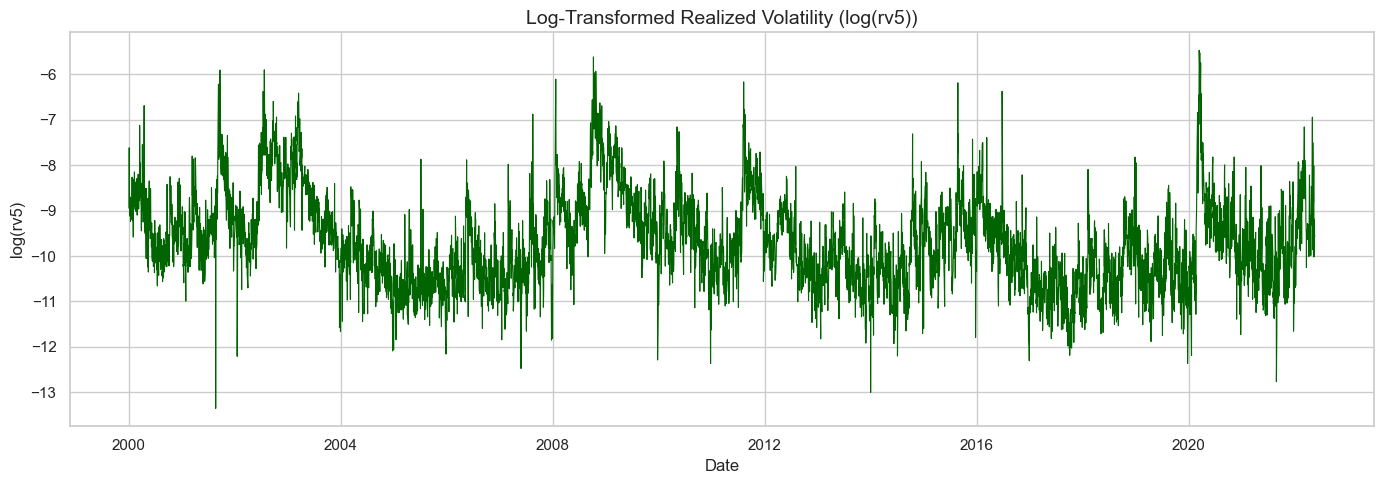

In [12]:
# Compute log volatility (add small constant to avoid log(0))
df_clean['log_rv5'] = np.log(df_clean['rv5'] + 1e-8)

# Plot log volatility over time
plt.figure(figsize=(14, 5))
plt.plot(df_clean['date'], df_clean['log_rv5'], color='darkgreen', linewidth=0.8)
plt.title('Log-Transformed Realized Volatility (log(rv5))', fontsize=14)
plt.xlabel('Date')
plt.ylabel('log(rv5)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import shapiro, jarque_bera
from statsmodels.stats.diagnostic import normal_ad

# 1. Test on Daily Returns
returns = df_clean['log_return'].dropna()
log_vol = df_clean['log_rv5'].dropna()

print("---- Normality Tests: log_return ----")
print("Shapiro-Wilk:", shapiro(returns))
print("Jarque-Bera:", jarque_bera(returns))
print("Anderson-Darling:", normal_ad(returns))

print("\n---- Normality Tests: log(rv5) ----")
print("Shapiro-Wilk:", shapiro(log_vol))
print("Jarque-Bera:", jarque_bera(log_vol))
print("Anderson-Darling:", normal_ad(log_vol))

---- Normality Tests: log_return ----
Shapiro-Wilk: ShapiroResult(statistic=0.9129752657995849, pvalue=3.157140058266076e-49)
Jarque-Bera: SignificanceResult(statistic=13054.265861958636, pvalue=0.0)
Anderson-Darling: (inf, 0.0)

---- Normality Tests: log(rv5) ----
Shapiro-Wilk: ShapiroResult(statistic=0.9843144609383622, pvalue=1.1299557791777196e-24)
Jarque-Bera: SignificanceResult(statistic=293.9271774907239, pvalue=1.4945978982096153e-64)
Anderson-Darling: (21.269894973276678, 0.0)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5706.
  res = hypotest_fun_out(*samples, **kwds)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5706.
  res = hypotest_fun_out(*samples, **kwds)


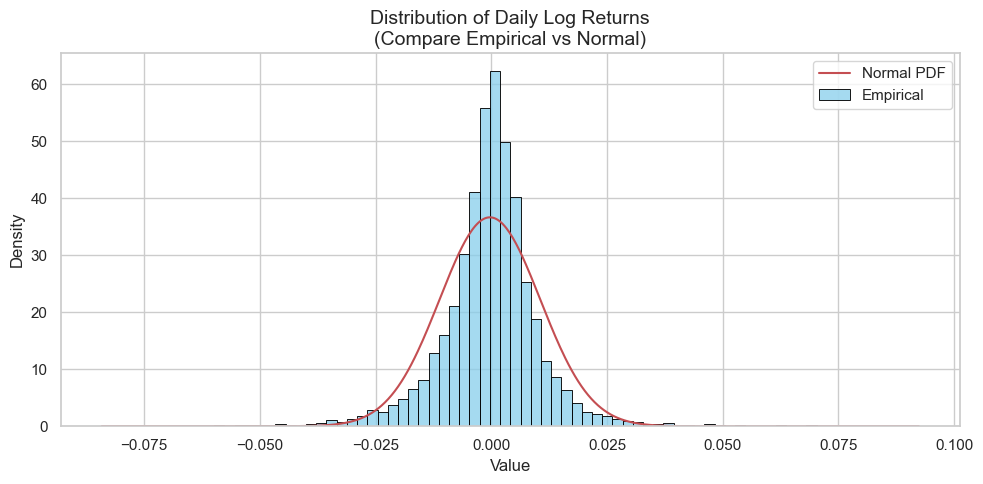

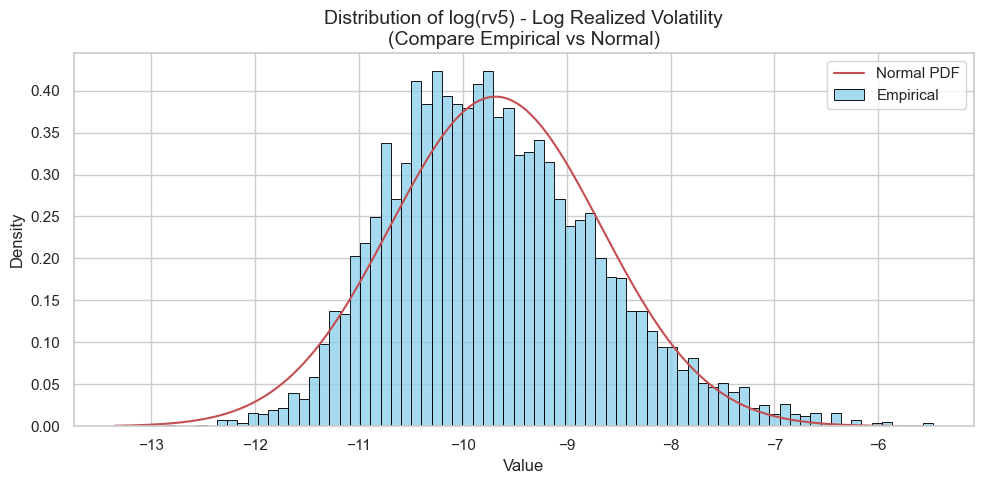

In [14]:
import seaborn as sns
from scipy.stats import norm

# Set seaborn style
sns.set(style="whitegrid")

# Extract data
returns = df_clean['log_return'].dropna()
log_vol = df_clean['log_rv5'].dropna()

# Plot function
def plot_vs_normal(data, title):
    plt.figure(figsize=(10, 5))
    sns.histplot(data, bins=80, kde=False, stat="density", color='skyblue', edgecolor='black', label='Empirical')

    # Fit a normal distribution and overlay it
    mu, std = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 500)
    plt.plot(x, norm.pdf(x, mu, std), 'r-', label='Normal PDF')

    plt.title(f"{title}\n(Compare Empirical vs Normal)", fontsize=14)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for log_return
plot_vs_normal(returns, 'Distribution of Daily Log Returns')

# Plot for log(rv5)
plot_vs_normal(log_vol, 'Distribution of log(rv5) - Log Realized Volatility')


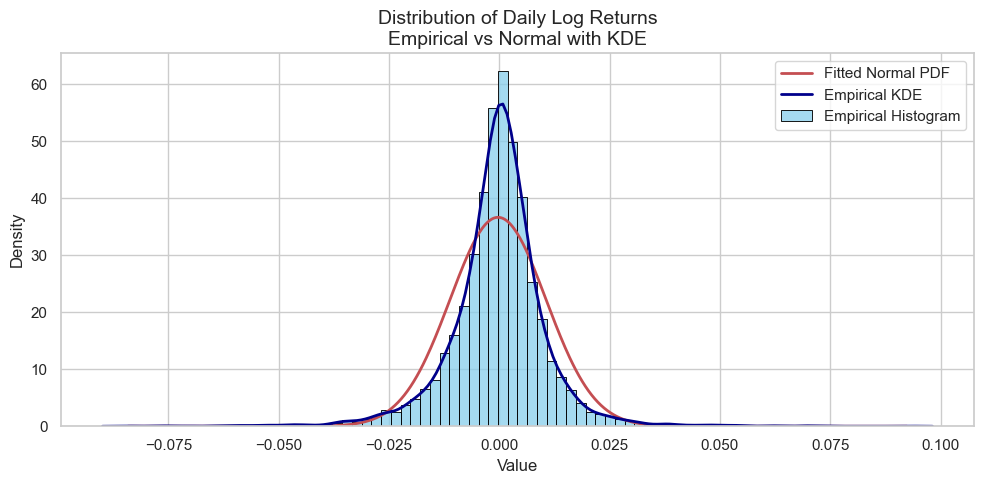

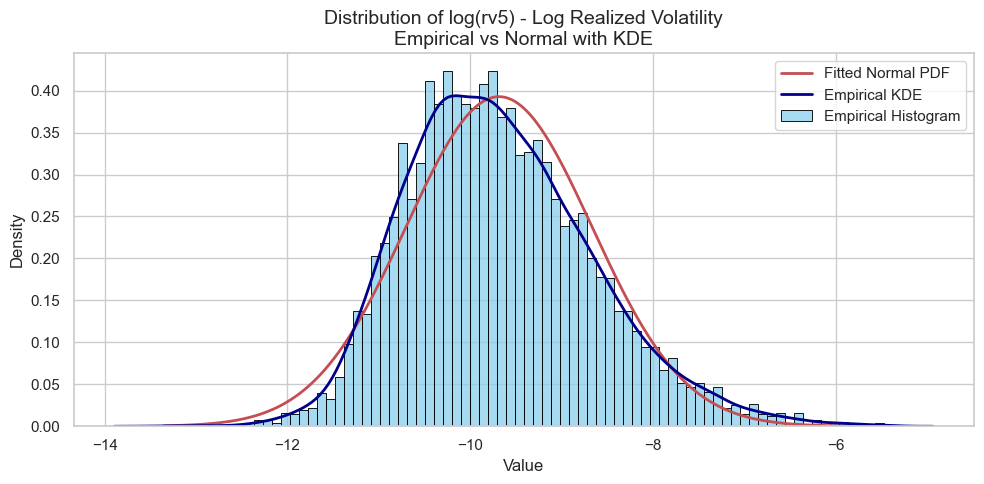

In [15]:
import seaborn as sns
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Extract data
returns = df_clean['log_return'].dropna()
log_vol = df_clean['log_rv5'].dropna()

# Plot function with KDE
def plot_vs_normal(data, title):
    plt.figure(figsize=(10, 5))
    
    # Histogram
    sns.histplot(data, bins=80, kde=False, stat="density", color='skyblue', edgecolor='black', label='Empirical Histogram')

    # Fitted normal distribution
    mu, std = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 500)
    plt.plot(x, norm.pdf(x, mu, std), 'r-', label='Fitted Normal PDF', linewidth=2)

    # KDE
    sns.kdeplot(data, color='darkblue', label='Empirical KDE', linewidth=2)

    # Labels & Legend
    plt.title(f"{title}\nEmpirical vs Normal with KDE", fontsize=14)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for log_return
plot_vs_normal(returns, 'Distribution of Daily Log Returns')

# Plot for log(rv5)
plot_vs_normal(log_vol, 'Distribution of log(rv5) - Log Realized Volatility')


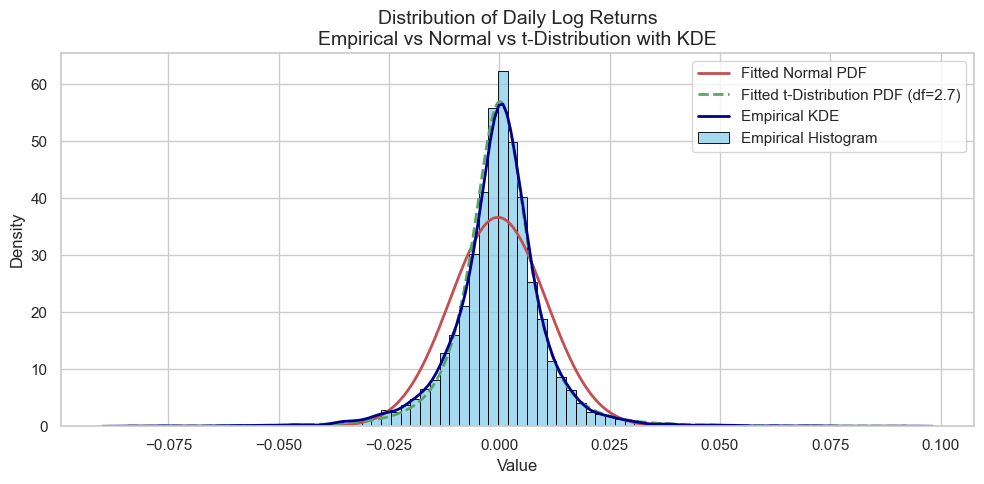

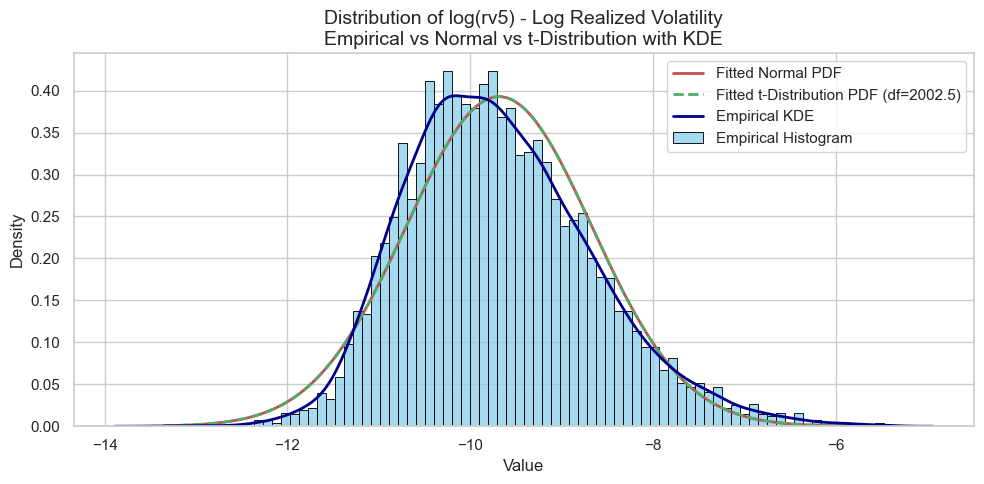

In [16]:
import seaborn as sns
from scipy.stats import norm, t
import numpy as np
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Extract data
returns = df_clean['log_return'].dropna()
log_vol = df_clean['log_rv5'].dropna()

# Plot function with both Normal and t-distribution fit
def plot_vs_normal_t(data, title):
    plt.figure(figsize=(10, 5))
    
    # Histogram
    sns.histplot(data, bins=80, kde=False, stat="density", color='skyblue', edgecolor='black', label='Empirical Histogram')

    # Fit Normal distribution
    mu_norm, std_norm = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 500)
    plt.plot(x, norm.pdf(x, mu_norm, std_norm), 'r-', label='Fitted Normal PDF', linewidth=2)

    # Fit Student's t-distribution
    df_t, loc_t, scale_t = t.fit(data)
    plt.plot(x, t.pdf(x, df_t, loc_t, scale_t), 'g--', label=f'Fitted t-Distribution PDF (df={df_t:.1f})', linewidth=2)

    # KDE
    sns.kdeplot(data, color='darkblue', label='Empirical KDE', linewidth=2)

    # Labels & Legend
    plt.title(f"{title}\nEmpirical vs Normal vs t-Distribution with KDE", fontsize=14)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for log_return
plot_vs_normal_t(returns, 'Distribution of Daily Log Returns')

# Plot for log(rv5)
plot_vs_normal_t(log_vol, 'Distribution of log(rv5) - Log Realized Volatility')
